In [116]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [117]:
image_ids = pd.read_csv("/Users/puttu/Documents/GitHub/DS541-Project-ImageSegmentation/data/CXR8/Data_Entry_2017_v2020.csv")

In [118]:
image_ids_frames = image_ids['Image Index'].to_frame()
image_ids_frames['Image Index'] = image_ids['Image Index'].apply(lambda change: change[:-4])

In [119]:
image_ids_frames['Patient'] = image_ids['Image Index'].apply(lambda change: change[0:8])
image_ids_frames['Index'] = image_ids_frames['Image Index'].apply(lambda change: change[-3:])
image_ids_frames

,Image Index,Patient,Index
0,00000001_000,00000001,000
1,00000001_001,00000001,001
2,00000001_002,00000001,002
3,00000002_000,00000002,000
4,00000003_001,00000003,001
...,...,...,...
112115,00030801_001,00030801,001
112116,00030802_000,00030802,000
112117,00030803_000,00030803,000
112118,00030804_000,00030804,000


In [156]:
image_ids_frames_counts = image_ids_frames.groupby('Patient')['Patient'].count().to_frame().reset_index(drop=True)

In [157]:
image_ids_frames_counts.columns = ['image count']

In [158]:
image_ids_frames_counts

,image count
0,3
1,1
2,8
3,1
4,8
...,...
30800,2
30801,1
30802,1
30803,1


In [159]:
image_count = image_ids_frames_counts.reset_index()

In [161]:
image_count.columns = ['patient number', 'image count']

<Axes: xlabel='patient number', ylabel='image count'>

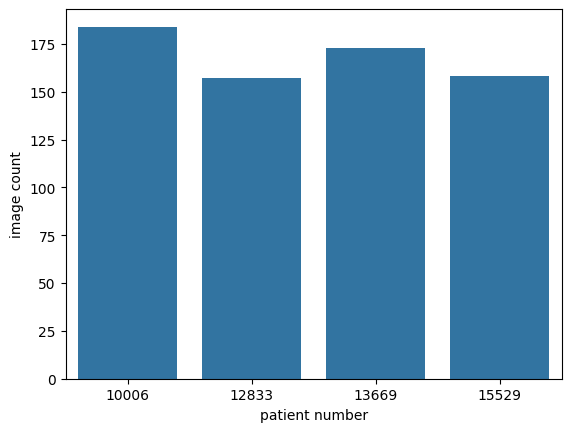

In [219]:
image_filtered_count = image_count[image_count['image count'] > 150]

sns.barplot(image_filtered_count, x='patient number', y ='image count')

In [189]:
image_frequency_count = image_count.groupby('image count').count().reset_index()

In [199]:
image_frequency_count

,image count,patient number
0,1,17503
1,2,4113
2,3,2100
3,4,1330
4,5,938
...,...,...
98,143,1
99,157,1
100,158,1
101,173,1


[Text(0, 0.5, '# of Patients'),
 Text(0.5, 0, 'Image Count'),
 Text(0.5, 1.0, 'Frequency of Number of Images Per Patient'),
 (0.0, 5000.0),
 (0.0, 25.0)]

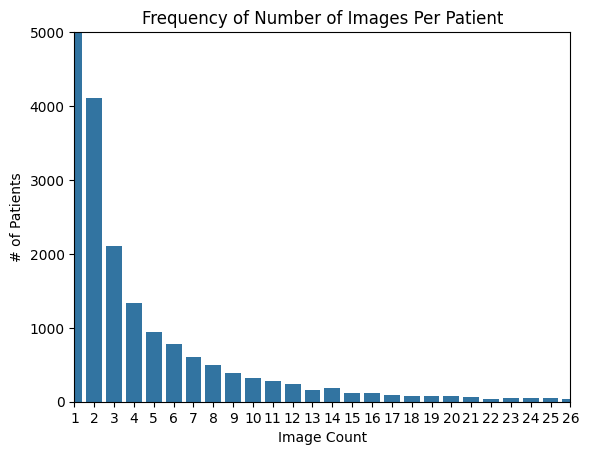

In [218]:
sns.barplot(image_frequency_count, x = 'image count', y = 'patient number').set(
    ylabel = "# of Patients",
    xlabel = "Image Count",
    title = "Frequency of Number of Images Per Patient",
    ylim = (0, 5000),
    xlim = (0, 25))

In [ ]:
# Minimum number of images a patient can have: 1
# Maximum number of images a patient can have: 184
# Average number of images per patient: 4

# about 17500 patients have just one image